In [1]:
import pandas as pd
import requests

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

In [2]:
url = 'http://localhost:5000/invocations'

In [3]:
data = {"dataframe_records": 
        [{'lat': 34.0443,
          'lon': -118.4268,
          'minutes_remaining': 10.0,
          'period': 1.0,
          'playoffs': 0.0,
          'shot_distance': 15.0},
         {'lat': 33.9093,
          'lon': -118.3708,
          'minutes_remaining': 7.0,
          'period': 1.0,
          'playoffs': 0.0,
          'shot_distance': 16.0}
        ]}

In [4]:
results = requests.post(url, json = data)

In [5]:
results.status_code

200

In [6]:
results.json()

{'predictions': [0.0, 0.0]}

In [7]:
data_inference = pd.read_csv("../data/05_model_input/base_inference.csv")

In [8]:
df_shot_flag = data_inference['shot_made_flag']
df_shot_flag

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
5407    0.0
5408    1.0
5409    0.0
5410    0.0
5411    0.0
Name: shot_made_flag, Length: 5412, dtype: float64

In [9]:
data_inference.drop('shot_made_flag', axis = 1,inplace=True)

In [10]:
data_inference

,lat,lon,minutes_remaining,period,playoffs,shot_distance
0,33.8063,-118.3638,1,3,0,25
1,33.8183,-118.3868,8,2,0,25
2,33.8583,-118.4528,0,3,0,26
3,33.7723,-118.2968,0,2,0,27
4,33.8503,-118.4248,2,1,0,24
...,...,...,...,...,...,...
5407,33.8283,-118.4038,2,1,1,25
5408,33.7833,-118.2878,0,2,1,26
5409,33.7943,-118.1888,7,3,1,26
5410,33.3653,-118.2818,0,3,1,67


In [11]:
results_inference = requests.post(url, json = {"dataframe_records": data_inference.to_dict(orient='records')})

In [12]:
results_inference

<Response [200]>

In [13]:
df_pred = pd.DataFrame(results_inference.json())
df_pred

,predictions
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
5407,0.0
5408,0.0
5409,0.0
5410,0.0


In [14]:
df_pred['predictions']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5407    0.0
5408    0.0
5409    0.0
5410    0.0
5411    0.0
Name: predictions, Length: 5412, dtype: float64

In [15]:
df_pred.query('predictions == 1')

,predictions
2381,1.0
4170,1.0
4830,1.0


In [ ]:
# Apenas 3 arremessos foram previstos com sucesso

In [16]:
data_inference.iloc[2381]

lat                   34.0043
lon                 -118.1828
minutes_remaining      4.0000
period                 1.0000
playoffs               0.0000
shot_distance          9.0000
Name: 2381, dtype: float64

In [17]:
data_inference.iloc[4170]

lat                   34.0443
lon                 -118.2698
minutes_remaining      6.0000
period                 2.0000
playoffs               0.0000
shot_distance          0.0000
Name: 4170, dtype: float64

In [18]:
data_inference.iloc[4830]

lat                   33.3333
lon                 -118.2348
minutes_remaining      0.0000
period                 3.0000
playoffs               1.0000
shot_distance         71.0000
Name: 4830, dtype: float64

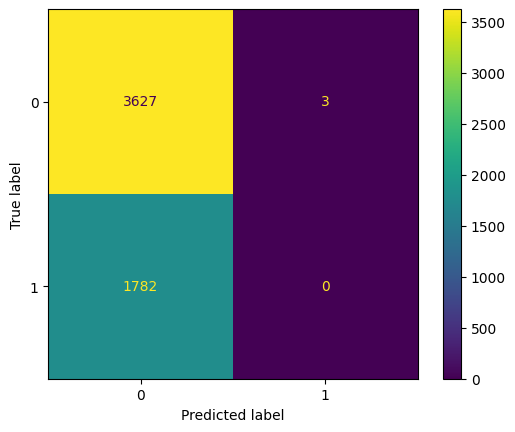

In [19]:
cm = confusion_matrix(df_shot_flag, df_pred['predictions'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [20]:
f1_score(df_shot_flag, df_pred['predictions'])

0.0

In [21]:
precision_score(df_shot_flag, df_pred['predictions'])

0.0

In [22]:
recall_score(df_shot_flag, df_pred['predictions'])

0.0